# Importing CSV

In [1]:
import pandas as pd
ccfr= pd.read_csv('creditcard.csv')
ccfr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
columns_to_keep= ['V12','V13','V14','V15','V16','V17','Class']
subdf= ccfr[columns_to_keep]
subdf.head()

,V12,V13,V14,V15,V16,V17,Class
0,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0
1,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,0
2,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,0
3,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,0
4,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,0


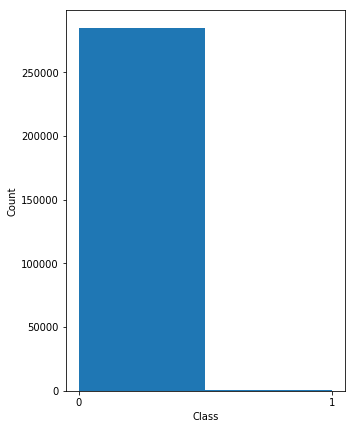

In [4]:
import matplotlib.pyplot as plt
x= ccfr['Class']
plt.figure(figsize=(5,7))
plt.hist(x,bins=2)
plt.xticks(ticks=[0,1])
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [5]:
fraud_df= ccfr[ccfr['Class']==1]
nonfraud_df= ccfr[ccfr['Class']==0]
fraudcount= fraud_df.count()[0]
nonfraudcount= nonfraud_df.count()[0]
print ("Frauds=",fraudcount)
print ("Non Frauds=",nonfraudcount)

Frauds= 492
Non Frauds= 284315


# Visualization

******************** COLUMN  V12  ***********************


C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


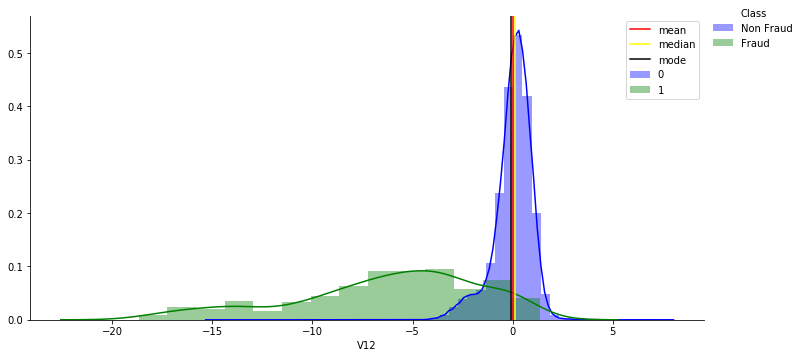

Standard Dev.= 0.9991996353557976
Variance.= 0.9983999112951588
Range= 26.5321067089889
 
******************** COLUMN  V13  ***********************


C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


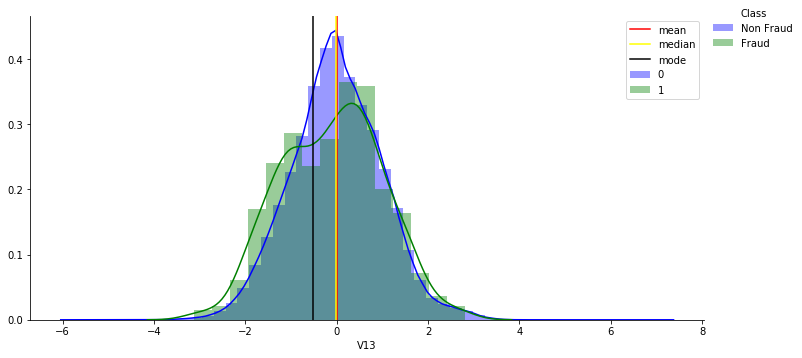

Standard Dev.= 0.9952724828452344
Variance.= 0.9905673151089174
Range= 12.918764164914599
 
******************** COLUMN  V14  ***********************


C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


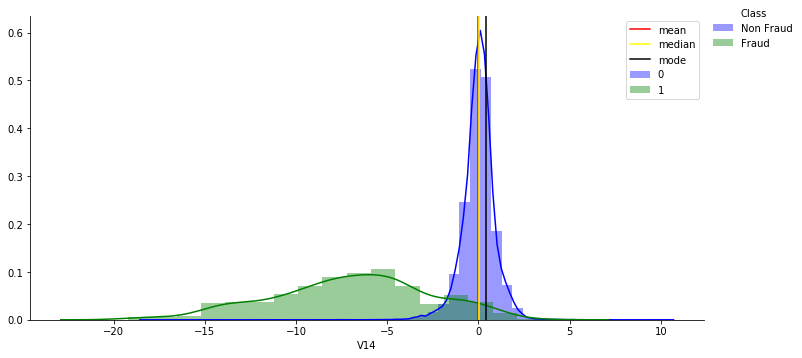

Standard Dev.= 0.9585939283692613
Variance.= 0.9189023195064124
Range= 29.7410915420461
 
******************** COLUMN  V15  ***********************


C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


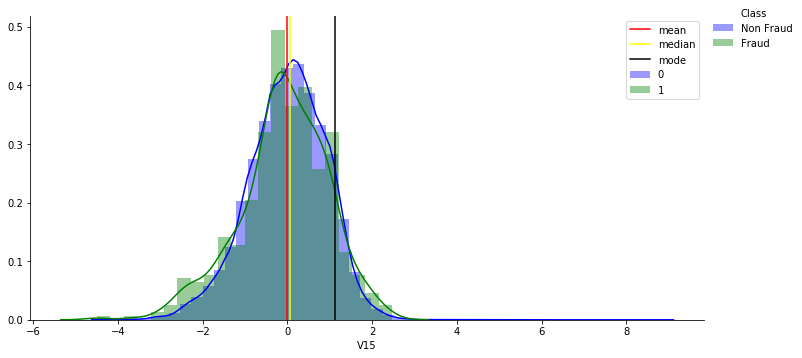

Standard Dev.= 0.915314404703279
Variance.= 0.837800459457318
Range= 13.37668627450898
 
******************** COLUMN  V16  ***********************


C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


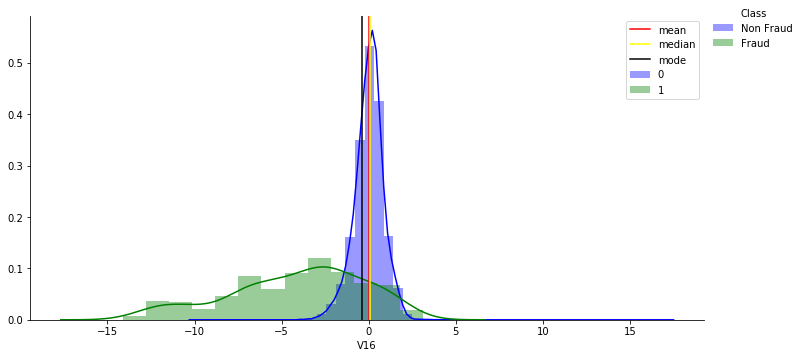

Standard Dev.= 0.876251349059508
Variance.= 0.7678164267286077
Range= 31.444966035120903
 
******************** COLUMN  V17  ***********************


C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


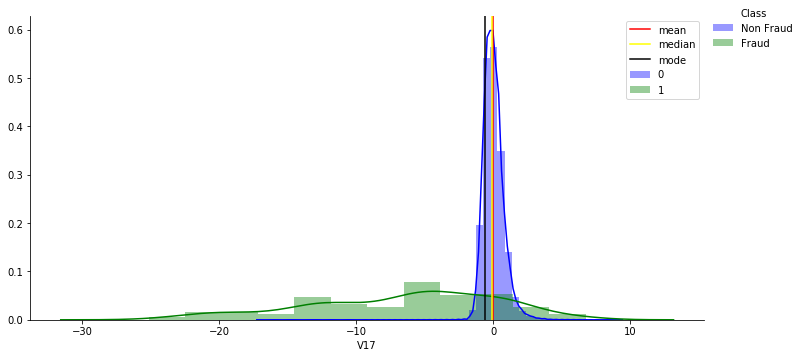

Standard Dev.= 0.8493355725983112
Variance.= 0.7213709148809011
Range= 34.41632561979765
 


In [22]:
import numpy as np
from scipy import stats
import seaborn as sns
for c in columns_to_keep[0:6]:
    print ("******************** COLUMN ",c," ***********************")
    col= subdf[c]
    col=np.array(col)
    col_mean= np.mean(col)
    col_median= np.median(col)
    col_mode= stats.mode(col)[0][0]
    col_std= np.std(col)
    col_var= np.var(col)
    col_range= col.max()-col.min()
    fig=sns.FacetGrid(ccfr,hue="Class",height=5,aspect=2,palette=["blue", "green"])
    fig.map(sns.distplot,c)
    fig.add_legend(labels=['Non Fraud','Fraud'])
    plt.axvline(col_mean,color='red',label='mean')
    plt.axvline(col_median,color='yellow',label='median')
    plt.axvline(col_mode,color='black',label='mode')
    plt.legend()
    plt.show()
    print ("Standard Dev.=",col_std)
    print ("Variance.=",col_var)
    print ("Range=",col_range)
    print (" ")

# Undersampling

In [23]:
nonfraud_undersampled= nonfraud_df.sample(fraudcount) #50:50 Ratio
ccfrnew= pd.concat([nonfraud_undersampled,fraud_df])
ccfrnew.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42021,40924.0,-1.488168,0.147488,3.013011,1.901961,0.290753,0.853606,-0.332207,0.566028,0.026025,...,-0.213714,-0.462389,-0.277462,-0.017184,0.408417,-0.138485,-0.070492,0.128354,18.96,0
176991,122992.0,2.042907,-0.202683,-0.701698,0.162485,0.051353,0.134167,-0.403815,-0.044463,1.059675,...,-0.213863,-0.420927,0.293020,0.032813,-0.252958,-0.618007,0.039861,-0.027035,9.99,0
134450,80813.0,-2.768762,2.648111,-0.123209,0.614897,-0.585905,0.697033,-1.491990,-3.018300,-0.583236,...,4.121518,-0.627965,0.438815,-0.032364,-0.210887,-0.308463,-0.016889,0.092863,15.24,0
98406,66650.0,0.968830,-1.232606,-0.183926,-0.316598,-1.045794,-0.561525,-0.124323,-0.133302,-0.616897,...,-0.314319,-0.791293,-0.138112,0.093587,0.239068,1.104744,-0.099644,0.026935,209.99,0
77432,57046.0,1.157729,-0.088809,0.389229,0.059631,-0.647738,-0.935398,-0.005602,-0.103173,-0.101848,...,-0.143520,-0.560945,0.091916,0.580930,0.093209,0.781269,-0.098272,0.003542,43.75,0


In [24]:
c1= ccfrnew[ccfrnew['Class']==0].count()[0] #nonfraund
c2= ccfrnew[ccfrnew['Class']==1].count()[0] #fraud
print ("Non frauds=",c1)
print ("Frauds=",c2)

Non frauds= 492
Frauds= 492


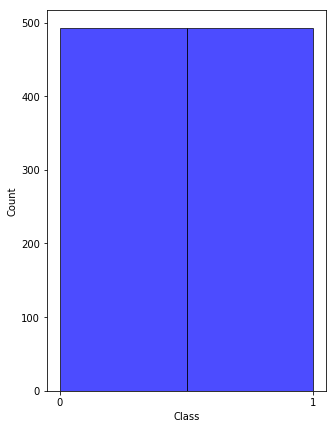

In [25]:
x= ccfrnew['Class']
plt.figure(figsize=(5,7))
plt.hist(x,bins=2,alpha=0.7,color='blue',edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Count')
newticks= [0,1]
plt.xticks(newticks)
plt.show()

# Shuffling and Train Test split

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
ccfrnew= shuffle(ccfrnew)
ccfr.reset_index(inplace= True)
ccfrnew.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
38413,39386.0,-0.797288,0.205887,1.082081,-0.358728,-0.936892,0.128793,0.134454,0.609211,0.030550,...,0.443922,0.995748,0.381648,0.033742,-1.065038,0.215612,0.045345,0.162950,150.00,0
213538,139294.0,-1.115000,1.100937,3.141721,4.866064,-1.480585,2.167867,-1.085046,1.141765,-0.198801,...,0.100059,0.657073,-0.273299,-0.074363,0.134304,0.676904,0.196328,0.088805,60.69,0
255403,157207.0,1.170756,2.501038,-4.986159,5.374160,0.997798,-1.259004,-1.237689,0.358426,-2.612489,...,0.123145,-0.713201,-0.080868,-0.964310,0.338568,0.068630,0.481588,0.268226,4.97,1
15736,27163.0,-23.914101,13.765942,-25.733734,6.290918,-17.784824,-4.572498,-17.390764,15.794136,-3.819832,...,1.773399,-1.748426,-1.093104,0.147807,1.663792,-0.221024,1.458076,0.430315,99.99,1
201277,133812.0,-1.016351,0.723814,0.915294,-0.767091,-0.308802,0.022588,2.086814,-0.241650,-0.810582,...,-0.184067,-0.531297,-0.198482,0.040595,0.568557,0.370019,-0.086050,-0.033801,236.00,0


In [41]:
X = ccfrnew.drop('Class',axis=1) #independent variables columns Time to Amount
y = ccfrnew['Class'] #dependent varibles i.e. Class to be predicted
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.2, random_state=0) #80:20 Split
print ("Training Data:")
print ("xtrain:")
print (xtrain.head())
print ("xtest:")
print (xtest.head())
print ("Test Data:")
print ("ytrain:")
print (ytrain.head())
print ("ytest:")
print (ytest.head())
#train, test= train_test_split(ccfrnew, test_size=0.2, random_state=0)
#pca??

Training Data:
xtrain:
            Time         V1         V2         V3        V4         V5  \
230076  146179.0  -0.067672   4.251181  -6.540388  7.283657   0.513541   
47755    43347.0  -0.987181   0.167953   0.971642  0.846090   1.673682   
15539    26931.0 -22.561699  13.208904 -24.643819  6.232532 -16.905611   
238366  149640.0   0.754316   2.379822  -5.137274  3.818392   0.043203   
157918  110617.0  -1.101035  -1.674928  -0.573388  5.617556   0.765556   

              V6         V7         V8        V9   ...         V20       V21  \
230076 -2.635066  -1.865911   0.780272 -3.868248   ...    0.519404  0.415437   
47755  -0.299998  -0.088954   0.035715 -0.750531   ...   -0.085071  0.148508   
15539  -4.497439 -16.810184  14.955107 -3.871297   ...    1.621444  1.765987   
238366 -1.285451  -1.766684   0.756711 -1.765722   ...    0.369663  0.397058   
157918  0.440607   1.934740  -1.019788 -0.193244   ...   -0.038314 -0.412526   

             V22       V23       V24       V25     

# Correlation

In [53]:
df1= ccfrnew.drop('Class', axis=1)
df1.corrwith(ccfrnew['Class'])

Time     -0.186921
V1       -0.415389
V2        0.476431
V3       -0.553007
V4        0.710713
V5       -0.359309
V6       -0.379960
V7       -0.470146
V8        0.061199
V9       -0.558569
V10      -0.619393
V11       0.688281
V12      -0.687237
V13      -0.049552
V14      -0.748422
V15      -0.066484
V16      -0.596826
V17      -0.555131
V18      -0.469976
V19       0.298672
V20       0.165712
V21       0.125606
V22      -0.003330
V23      -0.029933
V24      -0.082045
V25       0.049052
V26       0.065504
V27       0.061914
V28       0.076778
Amount    0.069979
dtype: float64

# Box Plot and Anomaly Detection

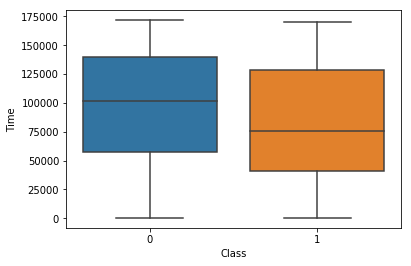

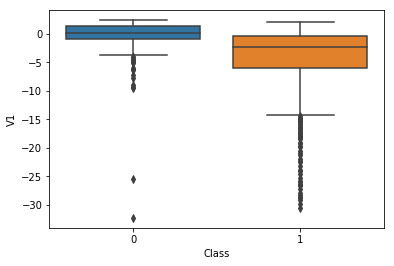

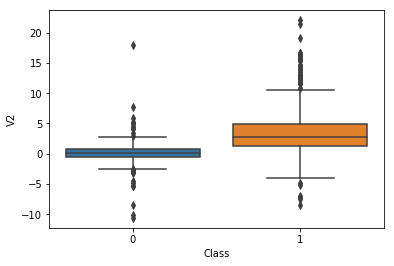

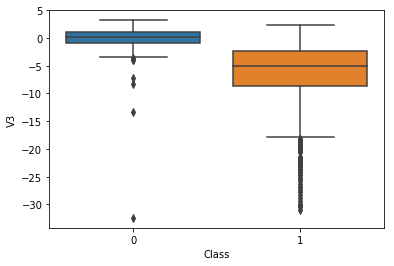

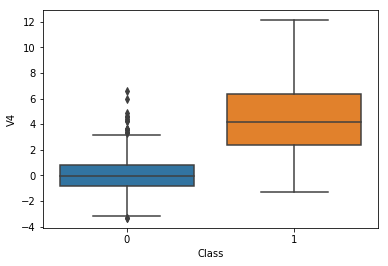

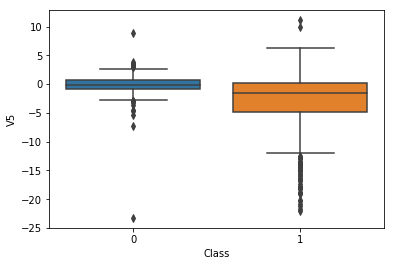

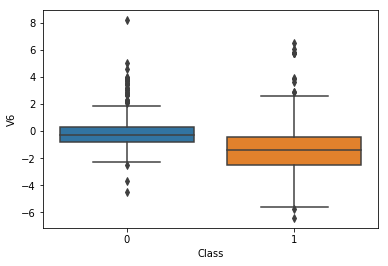

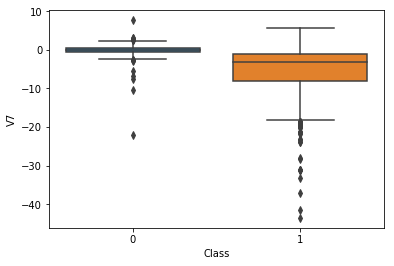

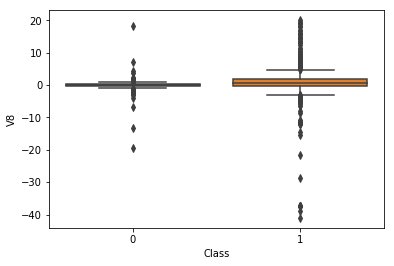

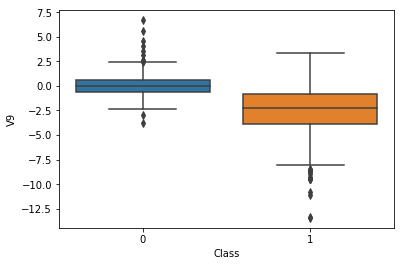

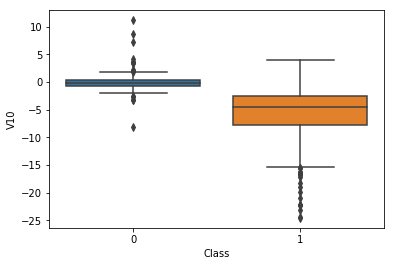

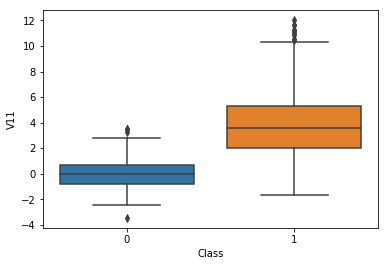

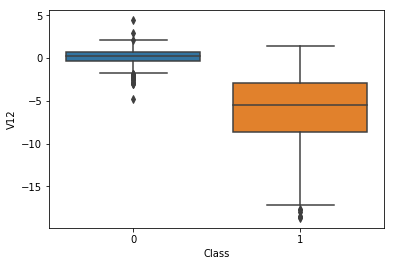

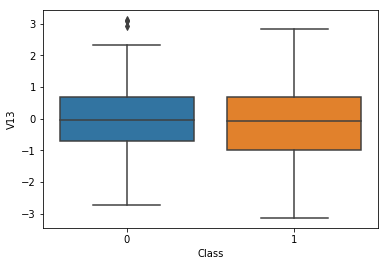

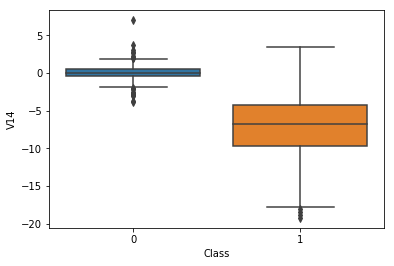

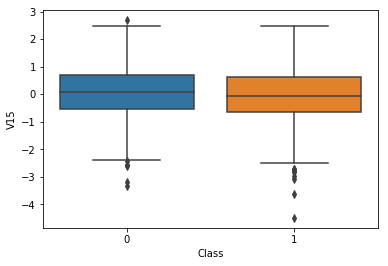

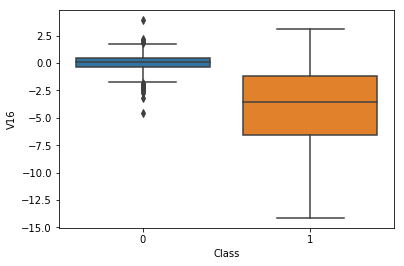

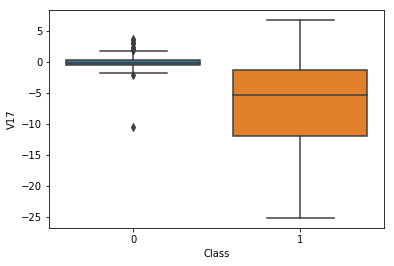

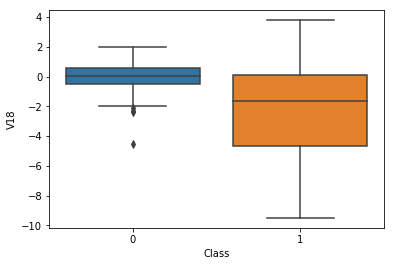

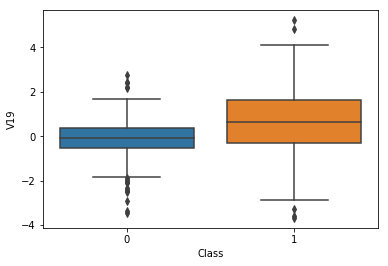

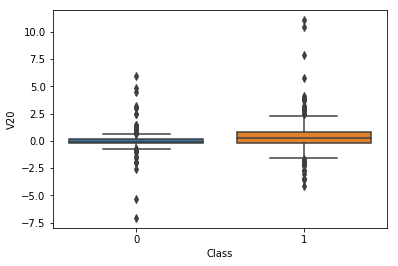

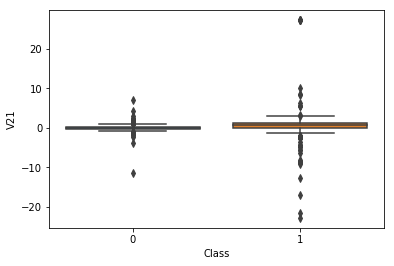

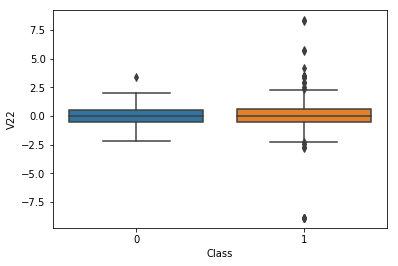

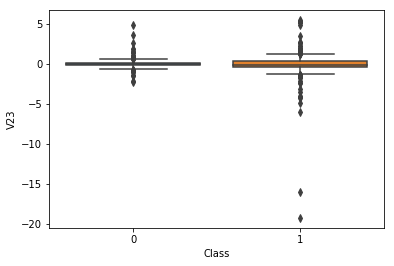

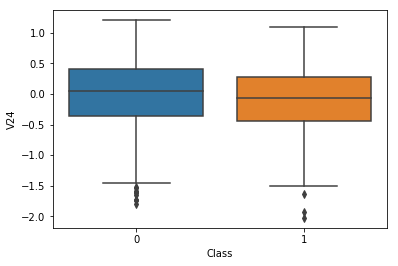

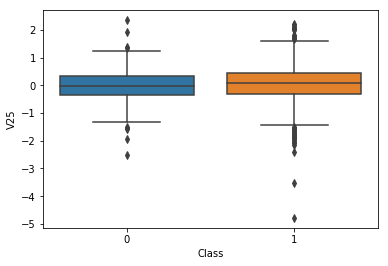

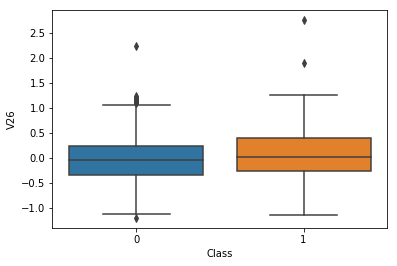

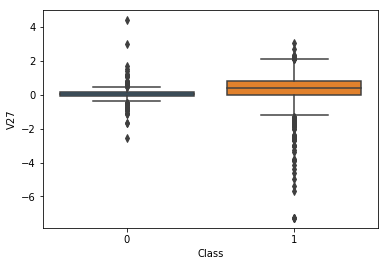

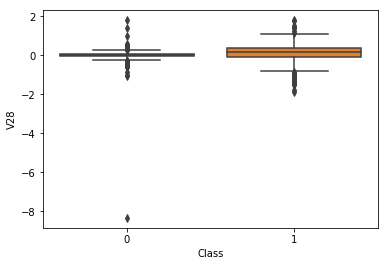

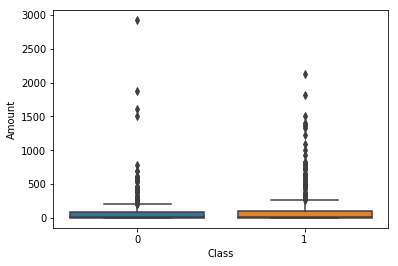

In [65]:
i=1
for c in df1.columns:
    plt.figure(i)
    sns.boxplot(x='Class',y= c, data=ccfrnew)
    i+=1

In [92]:
outliers=0 #FIX BUG!!!!!!!!
fraudoutliers=0
olrow= []
for col in df1:
    feature= ccfrnew[col].sort_values()
    q1= np.percentile(feature,25) #quartile1
    q3= np.percentile(feature,75) #quartile2
    iqr= q3-q1 #Inter Quartile Range
    maximum= q3+(1.5*iqr) #extremes
    minimum= q1-(1.5*iqr)
    for i in feature.iteritems():
        if i[1]>maximum or i[1]<minimum:
            if i[0] not in olrow:
                outliers+=1
                olrow.append(i[0])
df2= ccfrnew[ccfrnew['Class']==1]
df2.drop('Class',axis=1,inplace=True)
olrow2= []
for col in df2:
    feature= df2[col].sort_values()
    q1= np.percentile(feature,25)
    q3= np.percentile(feature,75)
    iqr= q3-q1
    maximum= q3+(1.5*iqr)
    minimum= q1-(1.5*iqr)
    for i in feature.iteritems():
        if i[1]>maximum or i[1]<minimum:
            if i[0] not in olrow2:
                fraudoutliers+=1
                olrow2.append(i[0])
print ("Total Outliers=",outliers," ","Outliers that are fraud=", fraudoutliers)
print ("Percentage of outliers that are fraud=",(fraudoutliers/outliers)*100)
print ("Percentage of outlier=",(outliers/(492*2))*100)

Total Outliers= 444   Outliers that are fraud= 244
Percentage of outliers that are fraud= 54.95495495495496
Percentage of outlier= 45.1219512195122


In [94]:
ccfr.shape

(284807, 33)